In [1]:
!pip install numba

In [70]:
import random
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import ArrayLike
from numba import njit, float32, int64, float64
from typing import List

In [3]:
random.random?

In [4]:
def pi_mc(n_samples: int) -> float:
    count = 0
    for i in range(n_samples):
        point = (random.random(), random.random())
        count += (point[0] ** 2 + point[1] ** 2) < 1.0
    return 4.0 * count / n_samples

In [9]:
%%timeit
pi_mc(100_000)

55.3 ms ± 713 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
@njit
def pi_mc2(n_samples: int) -> float:
    count = 0
    for i in range(n_samples):
        point = (random.random(), random.random())
        count += (point[0] ** 2 + point[1] ** 2) < 1.0
    return 4.0 * count / n_samples

In [13]:
t0 = time.time()
print(pi_mc2(100_000))
print(time.time() - t0)

3.13688
1.2253427505493164


In [14]:
%%timeit
pi_mc2(100_000)

2.29 ms ± 915 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
def squares_nums(size: int) -> List[int]:
    x = []
    for i in range(size):
        x.append(i ** 2)
    return x

In [17]:
x = squares_nums(1000)

In [18]:
x

[0,
 1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361,
 400,
 441,
 484,
 529,
 576,
 625,
 676,
 729,
 784,
 841,
 900,
 961,
 1024,
 1089,
 1156,
 1225,
 1296,
 1369,
 1444,
 1521,
 1600,
 1681,
 1764,
 1849,
 1936,
 2025,
 2116,
 2209,
 2304,
 2401,
 2500,
 2601,
 2704,
 2809,
 2916,
 3025,
 3136,
 3249,
 3364,
 3481,
 3600,
 3721,
 3844,
 3969,
 4096,
 4225,
 4356,
 4489,
 4624,
 4761,
 4900,
 5041,
 5184,
 5329,
 5476,
 5625,
 5776,
 5929,
 6084,
 6241,
 6400,
 6561,
 6724,
 6889,
 7056,
 7225,
 7396,
 7569,
 7744,
 7921,
 8100,
 8281,
 8464,
 8649,
 8836,
 9025,
 9216,
 9409,
 9604,
 9801,
 10000,
 10201,
 10404,
 10609,
 10816,
 11025,
 11236,
 11449,
 11664,
 11881,
 12100,
 12321,
 12544,
 12769,
 12996,
 13225,
 13456,
 13689,
 13924,
 14161,
 14400,
 14641,
 14884,
 15129,
 15376,
 15625,
 15876,
 16129,
 16384,
 16641,
 16900,
 17161,
 17424,
 17689,
 17956,
 18225,
 18496,
 18769,
 19044,
 19321,
 19600,
 19881,
 20164,
 2

In [22]:
@njit
def squares_nums2(size: int) -> List[int]:
    x = []
    for i in range(size):
        x.append(i ** 2)
    return x

In [24]:
%%timeit
x = squares_nums(1000)

26.2 µs ± 642 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [23]:
%%timeit
x = squares_nums2(1000)

27 µs ± 1.02 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [25]:
!wget 'https://i.ytimg.com/vi/OVdoeun2VGE/maxresdefault.jpg' -O img.jpg

--2023-08-11 16:50:34--  https://i.ytimg.com/vi/OVdoeun2VGE/maxresdefault.jpg
Resolving i.ytimg.com (i.ytimg.com)... 142.251.2.119, 2607:f8b0:4023:c0d::77
Connecting to i.ytimg.com (i.ytimg.com)|142.251.2.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82775 (81K) [image/jpeg]
Saving to: ‘img.jpg’

img.jpg             100%[===================>]  80.83K  --.-KB/s    in 0.001s  

2023-08-11 16:50:34 (57.8 MB/s) - ‘img.jpg’ saved [82775/82775]



In [27]:
img = cv2.imread("img.jpg", 0)

In [28]:
img

array([[139, 139, 140, ..., 175, 175, 175],
       [138, 139, 139, ..., 176, 176, 176],
       [137, 137, 138, ..., 176, 176, 176],
       ...,
       [ 18,  18,  17, ..., 195, 195, 195],
       [ 18,  17,  16, ..., 195, 195, 195],
       [ 17,  17,  16, ..., 195, 195, 195]], dtype=uint8)

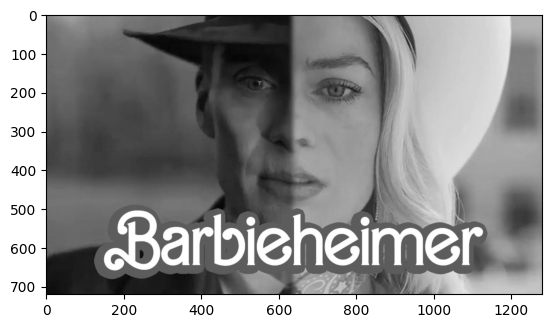

In [30]:
fig, ax = plt.subplots()
ax.imshow(img, cmap="gray")

$$
y[i, j] = \sum_{k}^{w} \sum_{l}^{w}x[i + k, j + l]h[k, l]
$$

In [32]:
def conv(img: ArrayLike, filt: ArrayLike) -> ArrayLike:
    k, l = filt.shape
    h, w = (
        img.shape[0] - filt.shape[0],
        img.shape[1] - filt.shape[1]
        )

    img_conv = np.zeros(shape=(h, w))
    for i in range(h):
        for j in range(w):
            img_conv[i, j] = (img[i: i + k, j: j + l] * filt).sum()
    return img_conv

In [42]:
filt = np.ones(shape=(50, 50)) / 50 ** 2
filt

array([[0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       ...,
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004],
       [0.0004, 0.0004, 0.0004, ..., 0.0004, 0.0004, 0.0004]])

In [43]:
img_conv = conv(img, filt)

[Text(0.5, 1.0, 'Conv')]

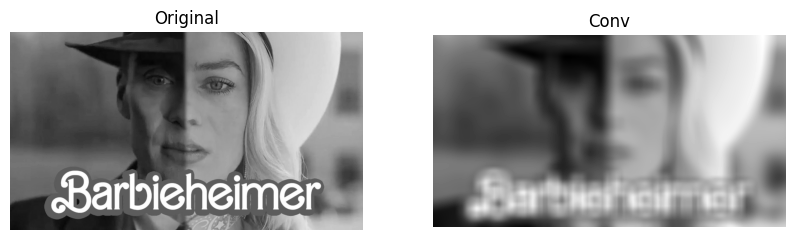

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
ax = axes[0]
ax.imshow(img, cmap="gray")
ax.axis(False)
ax.set(title="Original")

ax = axes[1]
ax.imshow(img_conv, cmap="gray")
ax.axis(False)
ax.set(title="Conv")

In [45]:
%%timeit
img_conv = conv(img, filt)

7.87 s ± 452 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [46]:
@njit
def conv2(img: ArrayLike, filt: ArrayLike) -> ArrayLike:
    k, l = filt.shape
    h, w = (
        img.shape[0] - filt.shape[0],
        img.shape[1] - filt.shape[1]
        )

    img_conv = np.zeros(shape=(h, w))
    for i in range(h):
        for j in range(w):
            img_conv[i, j] = (img[i: i + k, j: j + l] * filt).sum()
    return img_conv

In [47]:
img_conv = conv2(img, filt)

[Text(0.5, 1.0, 'Conv')]

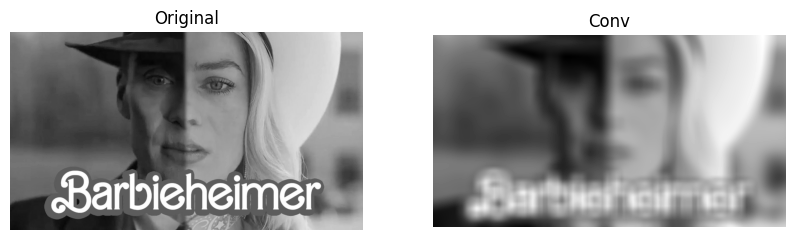

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
ax = axes[0]
ax.imshow(img, cmap="gray")
ax.axis(False)
ax.set(title="Original")

ax = axes[1]
ax.imshow(img_conv, cmap="gray")
ax.axis(False)
ax.set(title="Conv")

In [49]:
%%timeit
img_conv = conv2(img, filt)

7.14 s ± 454 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [50]:
img.dtype

dtype('uint8')

In [51]:
filt.dtype

dtype('float64')

In [52]:
img = img.astype(np.float32)
filt = filt.astype(np.float32)

In [56]:
@njit(float32[:, :](float32[:, :], float32[:, :]))
def conv3(img: ArrayLike, filt: ArrayLike) -> ArrayLike:
    k, l = filt.shape
    h, w = (
        img.shape[0] - filt.shape[0],
        img.shape[1] - filt.shape[1]
        )

    img_conv = np.zeros(shape=(h, w), dtype=np.float32)
    for i in range(h):
        for j in range(w):
            img_conv[i, j] = (img[i: i + k, j: j + l] * filt).sum()
    return img_conv

In [57]:
img_conv = conv3(img, filt)

[Text(0.5, 1.0, 'Conv')]

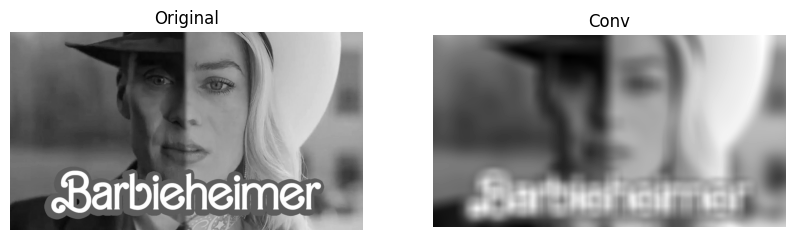

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
ax = axes[0]
ax.imshow(img, cmap="gray")
ax.axis(False)
ax.set(title="Original")

ax = axes[1]
ax.imshow(img_conv, cmap="gray")
ax.axis(False)
ax.set(title="Conv")

In [59]:
%%timeit
img_conv = conv3(img, filt)

7.23 s ± 297 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [60]:
y = np.array([0, 1, 1, 1, 0, 1, 0, 1, 0])
y2 = np.array([0, 1, 0, 1, 0, 0, 0, 1, 0])

In [61]:
(y == y2).mean()

0.7777777777777778

In [62]:
def accuracy(y: ArrayLike, y2: ArrayLike) -> float:
    acum = 0
    for i in range(y.size):
        acum += y[i] == y2[i]
    return acum / y.size

In [63]:
accuracy(y, y2)

0.7777777777777778

In [64]:
y = np.random.randint(0, 2, size=(1000, ))
y2 = np.random.randint(0, 2, size=(1000, ))

In [65]:
accuracy(y, y2)

0.491

In [73]:
@njit
def accuracy2(y: ArrayLike, y2: ArrayLike) -> float:
    acum = 0
    for i in range(y.size):
        acum += y[i] == y2[i]
    return acum / y.size

In [74]:
accuracy2(y, y2)

0.491

In [68]:
y.dtype

dtype('int64')

In [72]:
@njit(float64(int64[:], int64[:]))
def accuracy3(y: ArrayLike, y2: ArrayLike) -> float:
    acum = 0
    for i in range(y.size):
        acum += y[i] == y2[i]
    return acum / y.size

In [75]:
accuracy3(y, y2)

0.491

In [76]:
%%timeit
accuracy(y, y2)

391 µs ± 57.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [77]:
%%timeit
accuracy2(y, y2)

817 ns ± 265 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [78]:
%%timeit
accuracy3(y, y2)

1.45 µs ± 301 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [80]:
def accuracy4(y: ArrayLike, y2: ArrayLike) -> float:
    return (y == y2).mean()

In [81]:
%%timeit
accuracy4(y, y2)

11.1 µs ± 2.57 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [82]:
@njit
def accuracy5(y: ArrayLike, y2: ArrayLike) -> float:
    return (y == y2).mean()

In [84]:
%%timeit
accuracy5(y, y2)

2.65 µs ± 39.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [86]:
@njit(float64(int64[:], int64[:]))
def accuracy6(y: ArrayLike, y2: ArrayLike) -> float:
    return (y == y2).mean()

In [87]:
accuracy6(y, y2)

0.491

In [89]:
%%timeit
accuracy6(y, y2)

2.85 µs ± 66.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
